In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv("C:/Users/shivang/OneDrive/Desktop/Internship_project/flood.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [4]:
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [5]:
print("Null values per column:")
print(df.isnull().sum())
print("Number of duplicated rows:", df.duplicated().sum())

Null values per column:
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64
Number of duplicated rows: 0


In [6]:
df.dtypes

MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
dtype: object

In [7]:
target_col = "FloodProbability"
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != target_col]

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} outliers")

MonsoonIntensity: 686 outliers
TopographyDrainage: 711 outliers
RiverManagement: 661 outliers
Deforestation: 682 outliers
Urbanization: 687 outliers
ClimateChange: 647 outliers
DamsQuality: 741 outliers
Siltation: 671 outliers
AgriculturalPractices: 683 outliers
Encroachments: 688 outliers
IneffectiveDisasterPreparedness: 656 outliers
DrainageSystems: 731 outliers
CoastalVulnerability: 747 outliers
Landslides: 645 outliers
Watersheds: 686 outliers
DeterioratingInfrastructure: 663 outliers
PopulationScore: 677 outliers
WetlandLoss: 674 outliers
InadequatePlanning: 670 outliers
PoliticalFactors: 722 outliers


In [8]:
df_clean = df.copy()

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_clean[col] = df_clean[col].clip(lower, upper)

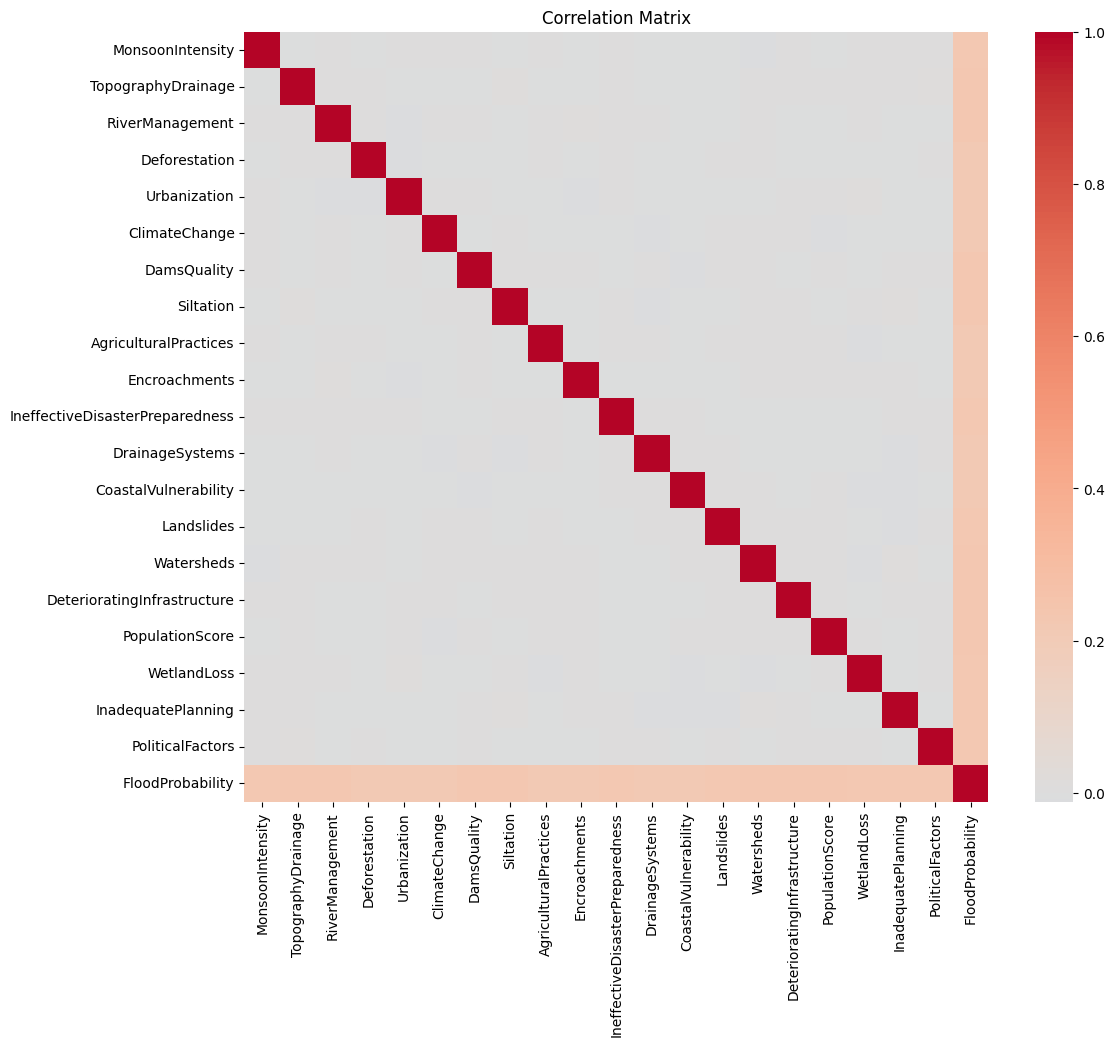

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df_clean.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# Features & Target
X = df_clean.drop("FloodProbability", axis=1)
y = df_clean["FloodProbability"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)

(40000, 20) (10000, 20)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Coefficients
print("Intercept:", model.intercept_)
print("Number of coefficients:", len(model.coef_))

Intercept: 0.49951862500000005
Number of coefficients: 20


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X_test_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

MSE: 1.4308201409317542e-05
RMSE: 0.0037826183272063733
MAE: 0.0021898193588868295
R2 Score: 0.9942550857985021


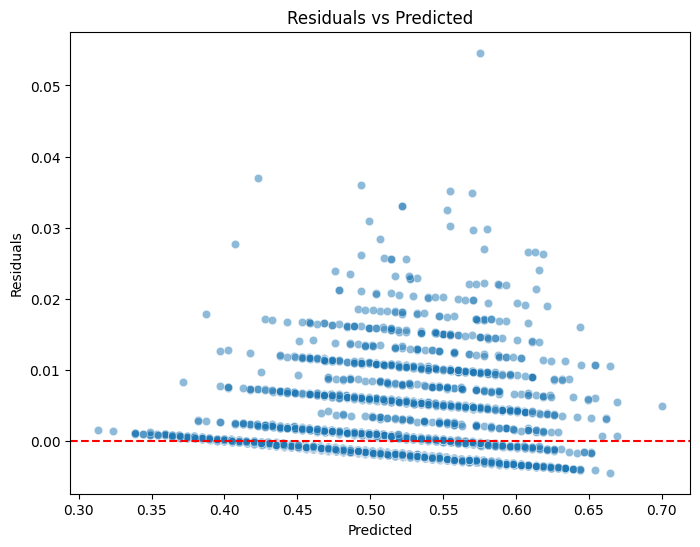

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

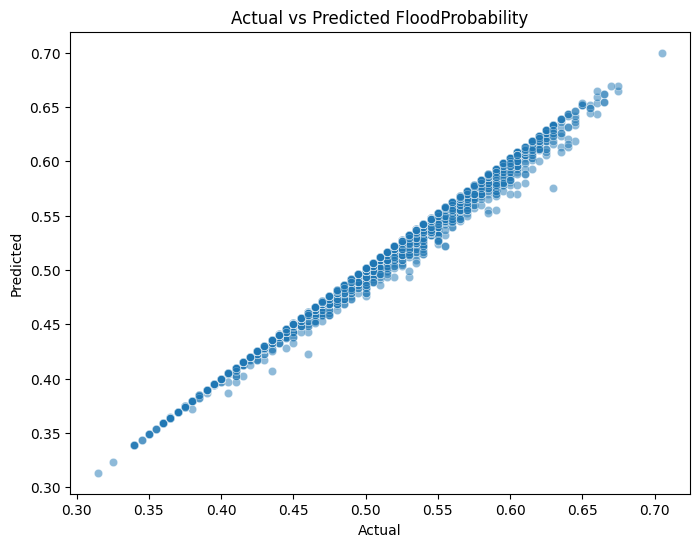

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted FloodProbability")
plt.show()


Shape of dataset: (50000, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50

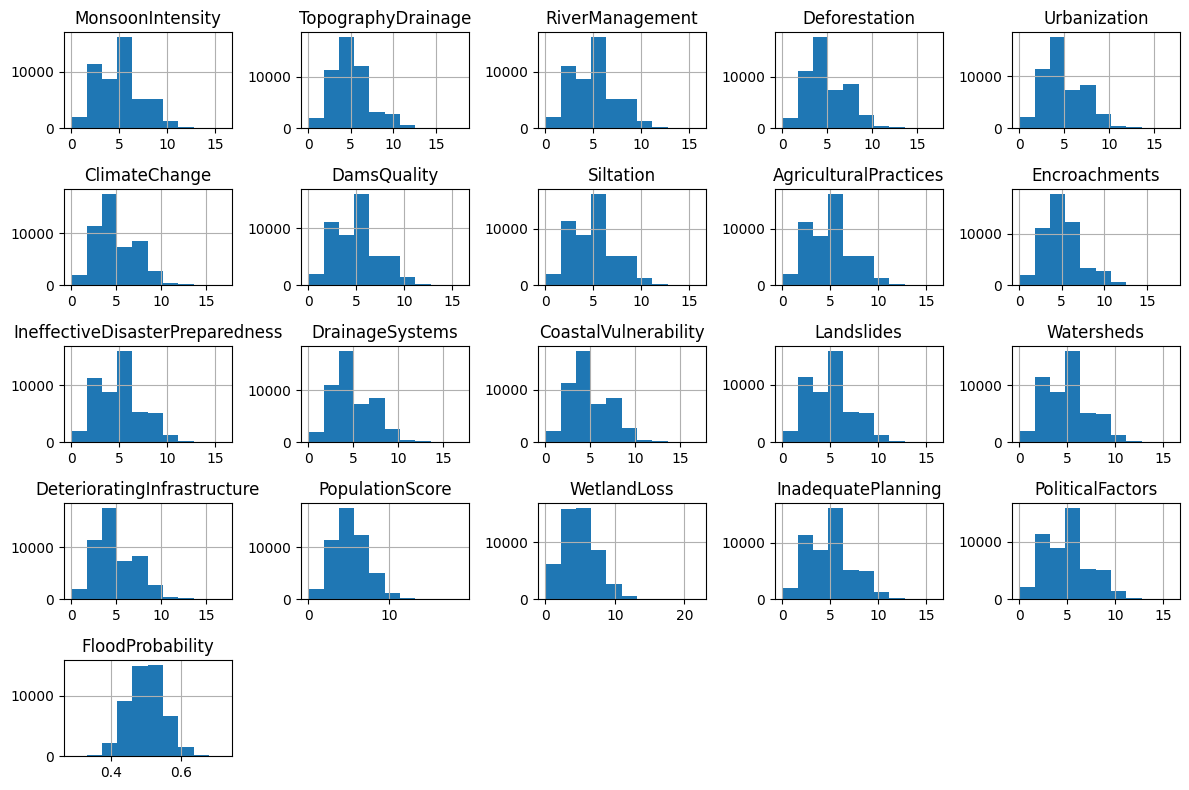

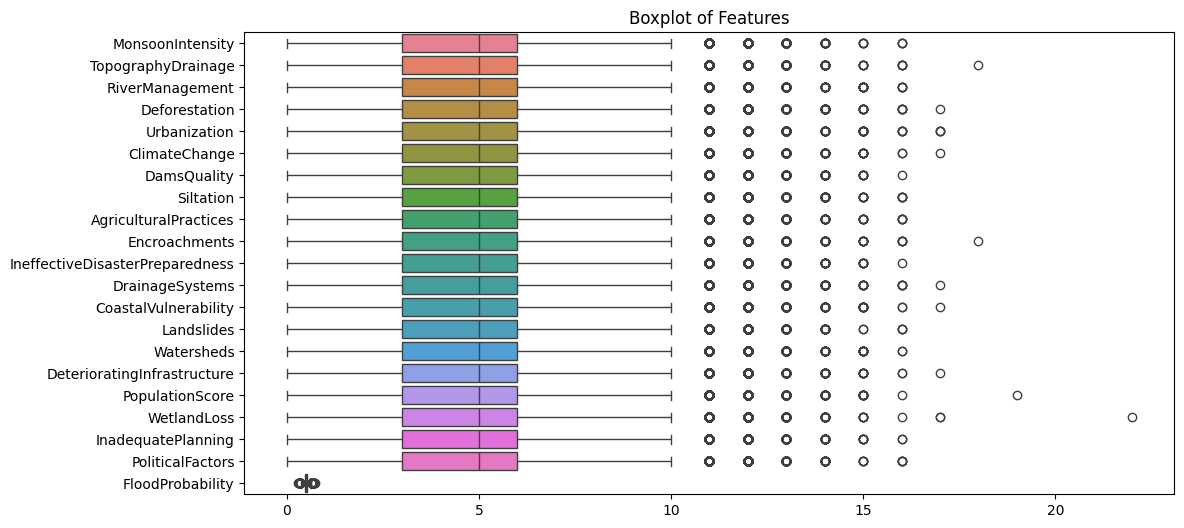

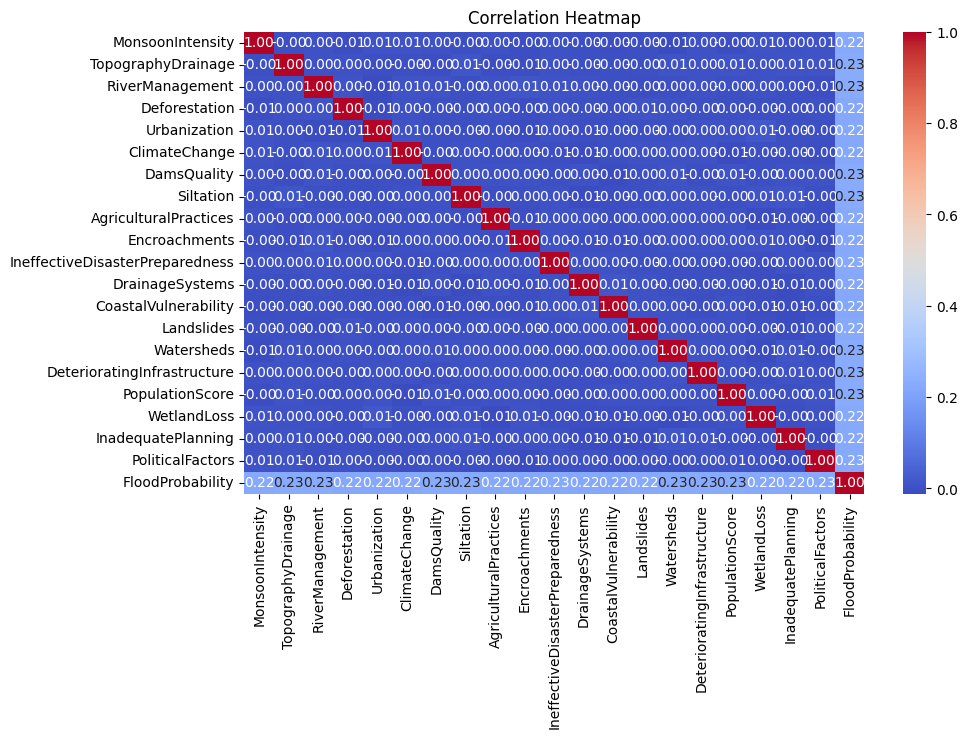

In [16]:

# --- Exploratory Data Analysis (EDA) ---

import matplotlib.pyplot as plt
import seaborn as sns

# First look at the data
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Missing values check
print("\nMissing values per column:")
print(df.isnull().sum())

# Distribution of numerical features
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot of Features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [17]:

# --- Data Transformation ---

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Handle missing values (simple strategy: fill numeric with mean, categorical with mode)
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# Encode categorical features if any
label_enc = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = label_enc.fit_transform(df[col])

# Scale numerical features
scaler = StandardScaler()
df[df.select_dtypes(include=["int64","float64"]).columns] = scaler.fit_transform(
    df.select_dtypes(include=["int64","float64"])
)

print("Data after transformation:")
print(df.head())


Data after transformation:
   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0         -0.890321            1.342509         0.441028       0.446084   
1          1.345004           -0.438066        -0.007144       0.895983   
2         -0.890321            2.232796        -0.455316      -1.803411   
3         -0.443256           -0.438066        -1.351659       0.895983   
4         -0.890321            0.897365        -0.007144      -1.353512   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0     -0.440927      -0.443851     0.438597  -1.338607              -0.897767   
1      0.896486       1.801586    -1.788597   0.005106              -0.002739   
2      0.896486       0.005236    -0.452281   0.900915              -0.450253   
3     -0.886732      -0.443851    -1.788597  -0.442798               0.444776   
4      0.004877       1.352498    -0.006842  -1.338607               0.892290   

   Encroachments  ...  DrainageSyst

In [18]:

# --- Feature Selection ---

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Assuming the dataset has a target column named 'target'
if 'target' in df.columns:
    X = df.drop("target", axis=1)
    y = df["target"]

    # SelectKBest (ANOVA F-test)
    selector = SelectKBest(score_func=f_classif, k=5)
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    print("Top 5 features selected by SelectKBest:", list(selected_features))

    # Feature importance using RandomForest
    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)
    importances = model.feature_importances_
    feature_importance = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)

    print("\nFeature Importance (RandomForest):")
    for feature, score in feature_importance:
        print(f"{feature}: {score:.4f}")
else:
    print("No 'target' column found. Please define the target variable for feature selection.")


No 'target' column found. Please define the target variable for feature selection.
